<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº6
#### Tobías Domenech

## Consigna

Dado las siguientes ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil: 

a) y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)
 

b) y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)
 

c)  y(n)=x(n)−x(n−1)
 

d)  y(n)=x(n)−x(n−2)
 

Se pide:

1) Hallar T(z)=Y(z)/X(z)

2) Calcular su respuesta en frecuencia de módulo y fase.

3) Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.

## Introducción

Hasta ahora hemos trabajo con las operaciones de transformación de Fourier (en tiempo continuo, discreta en tiempo (DTFT) y discreta (DFT)) asi como la de Laplace. En este caso, introduciremos una nueva operación conocida como la **transformada Z**. La misma permitirá trabajar en el dominio de las frecuencias pero, a diferencia de la DTFT, proveyendo un grado mayor de libertad facilitando la manipulación de secuencias divergentes.

Partiendo desde la DTFT se obtiene:
$$
\begin{align*}
h(n)\xrightarrow{DTFT}\, &H(j\omega)\triangleq\sum_{n=-\infty}^{\infty} \left(h[n]\right) e^{-j\omega n}\\
& H(j\omega,r) = \sum_{n=-\infty}^{\infty} \left(h[n]r^{-n}\right) e^{-j\omega n}\\
& H(j\omega,r) =  \sum_{n=-\infty}^{\infty} \left(h[n]\right) (re^{-j\omega})^{-n}\\[3ex]
& H(z) \triangleq  \sum_{n=-\infty}^{\infty} \left(h[n]\right) z^{-n}
\end{align*}
$$

Una propiedad particular de esta transformada se aprecia a través del siguiente esquema de sistema:
$$
\begin{align*}
x[n] \rightarrow \boxed{h[n]} \rightarrow y[n] = x[n-n_0]\\
Y(z) = \sum_{n=-\infty}^{\infty}y(n) z^{-n}\\
 = \sum_{n=-\infty}^{\infty}x(n-n_0) z^{-n}\\
 = \sum_{m=-\infty}^{\infty}x(m) z^{-m-n_0}\quad  &,m = n-n_0\\
 = [\sum_{m=-\infty}^{\infty}x(m) (z)^{-m}]z^{-n_0}\\[3ex]
 Y(z) = X(z)z^{-n_0}
\end{align*}
$$

Propiedad que indica que la demora generada en $n$ se transfiere al dominio de la frecuencia. Hecho remarcable a la hora de resolver ecueciones de diferencias como los planteados en este trabajo.

Si trbajamos con $z = 1 e^{j\omega}$ (reobteniendo la DTFT a partir de la transformada z; DTFT es la transformada z evaluada en valores de z en la circunferencia de radio unitario), será posible trabajar en el dominio de las frecuencias.

En este caso trabajaremos con sistemas lineales e invariables en el tiempo (LTI) caracterizados por ecuaciones de diferencias. Para escribirlos de manera más compacta, se busca y trabaja con la **función de transferencia**:
$$
H(z)=\frac{Y(z)}{X(z)}
$$
Donde $Y(z)$ es la salida del sistema y $X(z)$ la entrada. Este hecho, sumado a lo planteado anteriormente que  $z = 1 e^{j\omega}$, permitirá hallar las respuestas en frecuencia de fase y módulo de la función transferencia planteada.

Todo lo establecido hasta este punto llevará a poder denotar el comportamiento de los sitemas planteados (como pasabajo, pasabanda, pasaaltos, etc), la posición de sus ceros y polos, conocer de qué tipo de filtro estamos hablando. Para ello se calcularán las funciones de transeferencia, módulo y fase y, posteriormente, se compararán con los resultados obtenidos mediante la simulación en Python.

## Cálculo de la Función de Transferencia

### Sistema a
$y(n)=x(n−3)+x(n−2)+x(n−1)+x(n)$

En primera instancia, calculamos: 
$$
Y(z) = X(z)(z^{-3}+z^{-2}+z^{-1}+1)
$$
Luego,
$$
H(z) = \frac{Y(z)}{X(z)} = z^{-3}+z^{-2}+z^{-1}+1 = \frac{z^{3}+z^{2}+z^{1}+1}{z^{3}}
$$
Si evaluamos en $z = e^{j\omega}$, obtenemos
$$
H(e^{j\omega}) = \frac{e^{3j\omega}+e^{2j\omega}+e^{j\omega}+e^{0j\omega}}{e^{3j\omega}}
$$
Si de esta última expresión extraemos factor común:
$$
H(e^{j\omega}) = e^{\frac{-3}{2}j\omega} (e^{\frac{-3}{2}j\omega}+e^{\frac{-1}{2}j\omega}+e^{\frac{1}{2}j\omega}+e^{\frac{3}{2}j\omega})
$$

Teniendo en cuenta la identidad de Euler donde,
$$
cos(\omega) = \frac{e^{j\omega}+e^{-j\omega}}{2}
$$
$$
sin(\omega) = \frac{e^{j\omega}-e^{-j\omega}}{2j}
$$

Se rescribe la función de transeferencia como:
$$
H(e^{j\omega}) = e^{\frac{-3}{2}j\omega} \;2\;[cos(\frac{\omega}{2})+cos(\frac{3\omega}{2})]
$$

De donde se obtiene que:
$$
\angle{H(e^{j\omega})} = \angle{e^{\frac{-3}{2}j\omega}} = -\frac{3\omega}{2}
$$
$$
\left|H(e^{j\omega})\right| = \left|H_R(e^{j\omega})\right| = \left|2\;[cos(\frac{\omega}{2})+cos(\frac{3\omega}{2})]\right|
$$

Por lo tanto, para el sistema a se obtiene:
$$
\left\{
\begin{array}{l}
H(z) = \dfrac{z^{3}+z^{2}+z+1}{z^{3}} \\[1ex]
H(e^{j\omega}) = e^{\frac{-3}{2}j\omega} \;2\;[cos(\frac{\omega}{2})+cos(\frac{3\omega}{2})] \\[1ex]
\angle H(e^{j\omega}) = -\dfrac{3\omega}{2} \\[1ex]
\left| H(e^{j\omega}) \right| = 2\left| \left( \cos\left( \dfrac{\omega}{2} \right) + \cos\left( \dfrac{3\omega}{2} \right) \right) \right|
\end{array}
\right.
$$

Si se repite el mismo proceder para los otros sistemas, se obtiene que:

### Sistema b
$ y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)$

$$
\left\{
\begin{array}{l}
H(z) = \dfrac{z^{4}+z^{3}+z^{2}+z+1}{z^{4}} \\[1ex]
H(e^{j\omega}) = e^{-2j\omega} \; \left[ 1 + 2\left( \cos(\omega)+cos(2\omega) \right) \right] \\[1ex]
\angle H(e^{j\omega}) = -2\omega \\[1ex]
\left| H(e^{j\omega}) \right| = \left| 1 + 2\left( \cos(\omega) + \cos(2\omega) \right) \right|
\end{array}
\right.
$$

### Sistema c
$ y(n)=x(n)−x(n−1)$

$$
\left\{
\begin{array}{l}
H(z) = \dfrac{z-1}{z} \\[1ex]
H(e^{j\omega}) = e^{-\frac{j\omega}{2}} \;2j\;\sin(\frac{\omega}{2}) \\[1ex]
\angle H(e^{j\omega}) = \angle{e^{-\frac{j\omega}{2}}}+\angle{2j\;\sin(\frac{\omega}{2})} = -\dfrac{\omega}{2} + \dfrac{\pi}{2} \\[1ex]
\left| H(e^{j\omega}) \right| = 2 \left| \sin(\frac{\omega}{2}) \right|
\end{array}
\right.
$$

### Sistema d
$ y(n)=x(n)−x(n−2)$

$$
\left\{
\begin{array}{l}
H(z) = \dfrac{z^{2}-1}{z^{2}} \\[1ex]
H(e^{j\omega}) = e^{-j\omega} \;2j\;\sin(\omega) \\[1ex]
\angle H(e^{j\omega}) = \angle{e^{-j\omega}}+\angle{2j\;\sin(\omega)} = -\omega + \dfrac{\pi}{2} \\[1ex]
\left| H(e^{j\omega}) \right| = 2 \left| sin(\omega) \right|
\end{array}
\right.
$$

## Simulación

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.style.use('default')

def analyze_system(b, a, system_name):
  
    # Crear figura con 1 fila, 3 columnas
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Análisis del Sistema {system_name}', y=1.05)
    
    # Calcular respuesta en frecuencia
    w, h = sig.freqz(b, a)
    
    
    # 1. Gráfico de magnitud (escala lineal)
    ax1.plot(w, np.abs(h), 'b', linewidth=2)
    ax1.set_xlabel('ω [rad/muestra]')
    ax1.set_ylabel('Magnitud')
    ax1.set_title('Respuesta en Magnitud')
    ax1.grid(True, alpha=0.3)
    
    # 2. Gráfico de fase (radianes)
    ax2.plot(w, np.unwrap(np.angle(h)), 'r', linewidth=2)
    ax2.set_xlabel('ω [rad/muestra]')
    ax2.set_ylabel('Fase [rad]')
    ax2.set_title('Respuesta en Fase')
    ax2.grid(True, alpha=0.3)
    
    # 3. Diagrama de polos y ceros usando tf2zpk
    zeros, poles, _ = sig.tf2zpk(b, a)
    
    # Cálculo de polos en z=0 (multiplicidad = len(a)-1 - len(poles))
    pole_multiplicity = len(b) - 1 - len(poles)
    
    # Círculo unitario
    circle = plt.Circle((0, 0), 1, fill=False, linestyle='--', color='black', alpha=0.5)
    ax3.add_patch(circle)
    
    # Graficar polos y ceros
    ax3.scatter(np.real(zeros), np.imag(zeros), marker='o', facecolors='none',
               edgecolors='r', s=80, label='Ceros', linewidths=2)
   # Graficar polos múltiples en z=0
    if pole_multiplicity > 0:
        ax3.scatter([0], [0], marker='x', color='b', s=80, 
                   linewidths=2, label=f'Polo (multiplicidad {pole_multiplicity})')
    
    ax3.set_xlabel('Re')
    ax3.set_ylabel('Im')
    ax3.set_title('Diagrama de Polos y Ceros')
    ax3.legend(loc='upper left')
    ax3.axis('equal')
    ax3.grid(True, alpha=0.3)
    
    
    plt.tight_layout()
    plt.show()

# Definición de los sistemas

a = [1, 1, 1, 1]     # y(n) = x(n-3) + x(n-2) + x(n-1) + x(n)
b = [1, 1, 1, 1, 1]   # y(n) = x(n-4) + ... + x(n)
c = [1, -1]           # y(n) = x(n) - x(n-1)
d = [1, 0, -1]        # y(n) = x(n) - x(n-2)


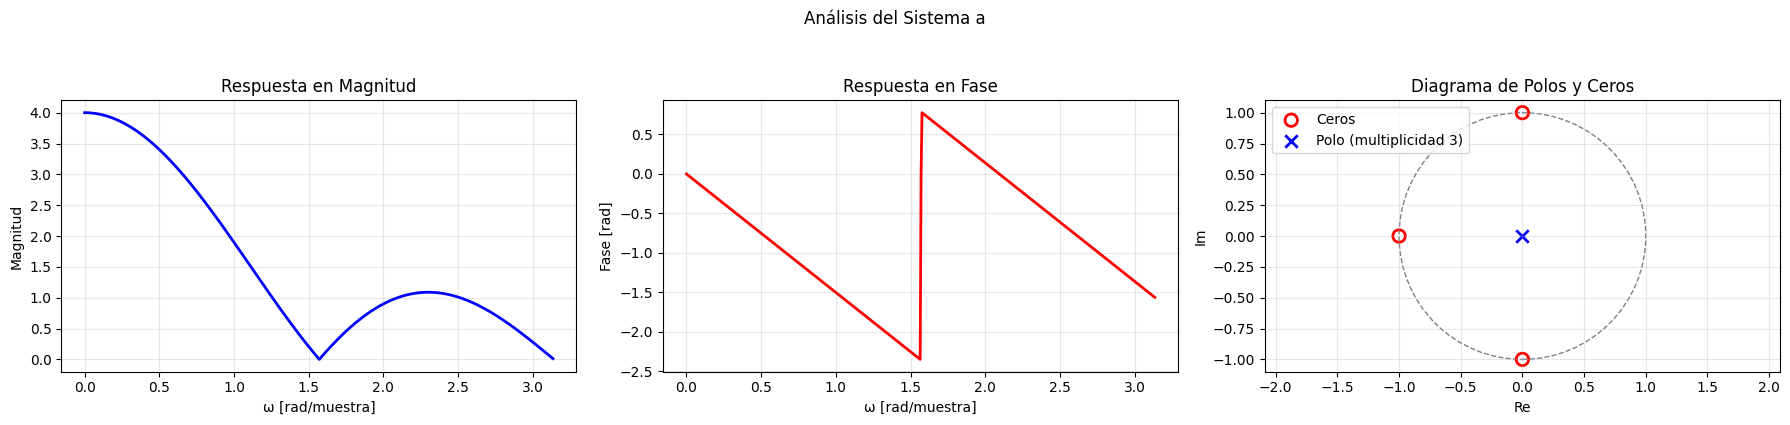

In [2]:
analyze_system(a, 1, 'a')

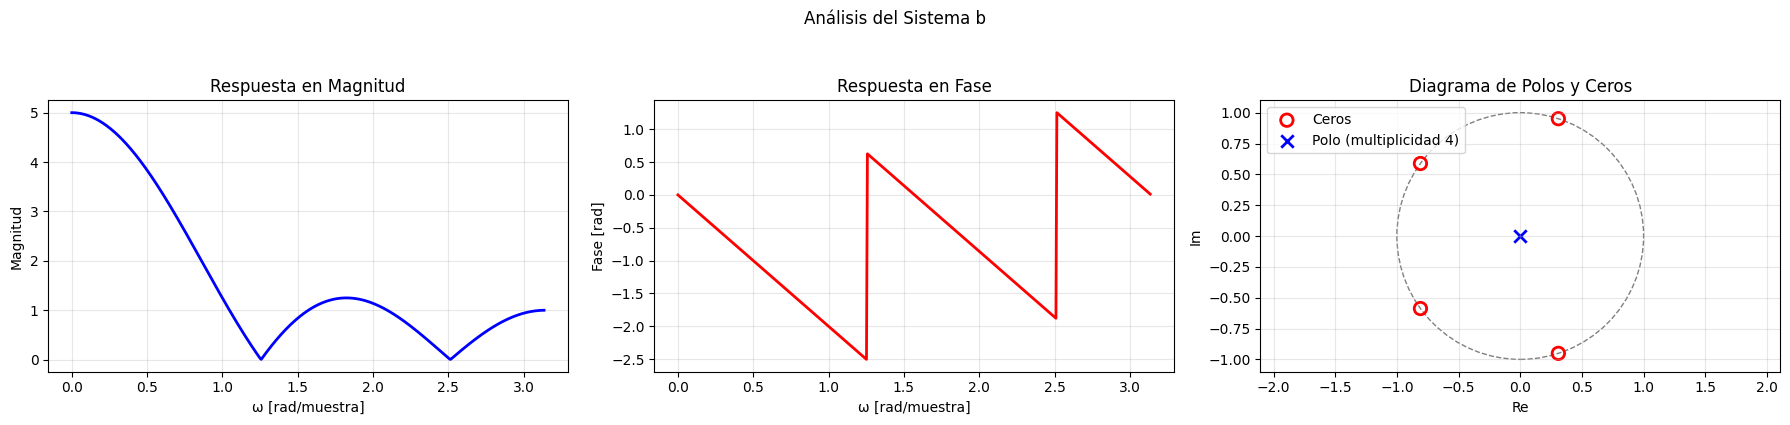

In [3]:
analyze_system(b, 1, 'b')

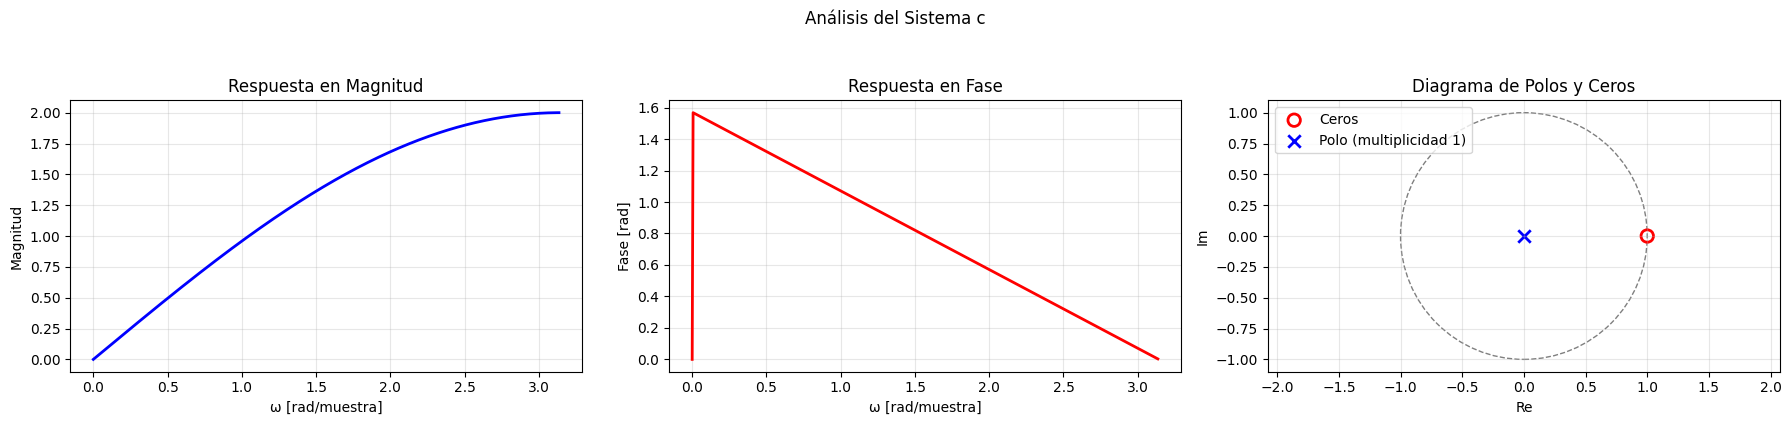

In [4]:
analyze_system(c, 1, 'c')

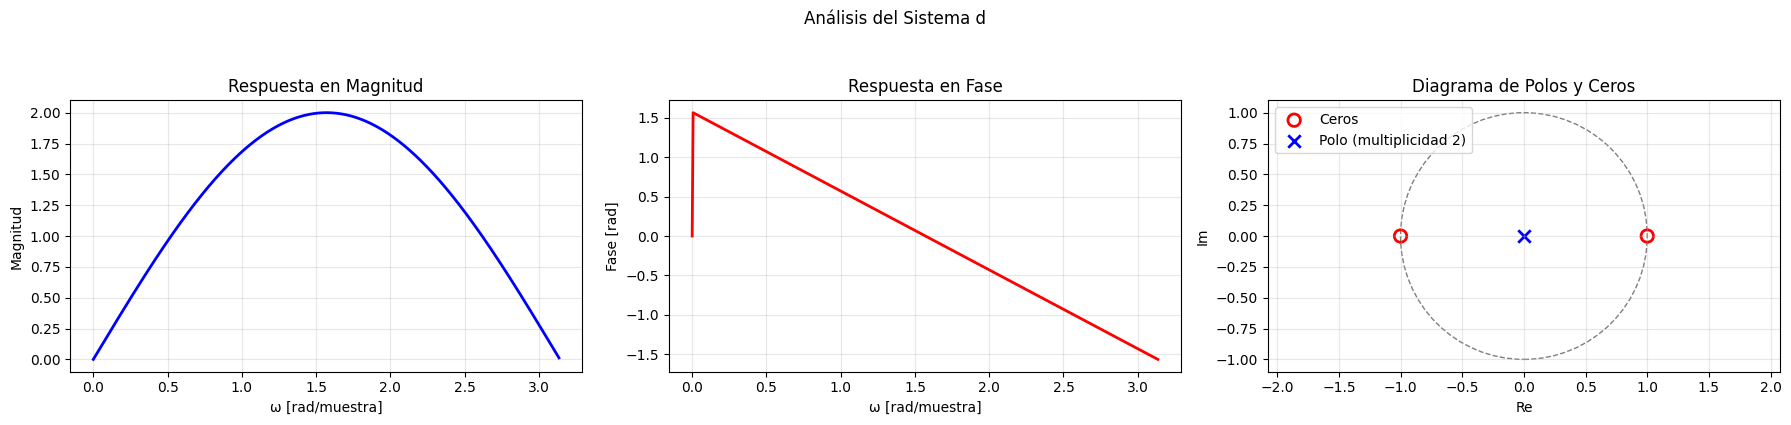

In [5]:
analyze_system(d, 1, 'd')

## Resultados y Conclusiones

De los sistemas dados se denota que:
- Las salidas de los mismo solo se ve determinada por la entrada actual y anteriores, característica esencial de los sistemas de tipo no recursivo (salida actual solo influida por entrada actual y anteriores).
- En todos casos los polos de los sistemas (notando el diagrama de polos y ceros) se encuentran en el origen, centrados respecto de la circunferencia de radio unitario. Este hecho es característico de los filtros de tipo **FIR** (Finite Impulse Response) donde se garantiza la estabilidad (dada por encontrarse los polos dentro de la circunferencia y la región de convergencia de la función (ROC; radio desde el polo más alejado del origen hasta el infinito) incluye la circunferencia de radio unitario).
- En los cuatro casos expuestos, los ceros de los sistemas pueden trazarse sobre la circunferencia de radio unitario.

En los casos de los **sistemas a y b**, apreciando la respuesta de modulo se aprecia su comportamiento como filtro **pasabajos**, siendo el caso b un sistema de mayor complejidad respecto del a dada la mayor cantidad de coedifientes. Resulta de interes que, en ambos casos, la posición de los ceros del sistema generan mínimos en la respuesta de módulo y saltos en las respuestas de fase. Notese que el módulo máximo del sistema a vale 4, mientras que en el b este valor es de 5. A pessar de los saltos generados por la disposición de los ceros de cada sistema, la respuesta en fase del sistema a mantiene un comportamiento lineal decreciente con pendiente $-\frac{3}{2}$ y, en el caso del sistema b, de $-2$

El caso del **sistema c** se trata de un filtro **pasaaltos**, con valor máximo de la respuesta en módulo igual a 2 y un comportamiento lineal de fase que decrece con una pendiente de  $-\frac{1}{2}$

Por último, el **sistema d** representa un filtro **pasabandas**, con valor máximo de la respuesta en módulo igual a 2 y un comportamiento lineal de fase que decrece con una pendiente de -1.